>[Норми векторів](#scrollTo=xz9Rzf-4k0oz)

>[Стандартизація/нормалізація даних](#scrollTo=zK1dpYovvk7-)

>[Метрики подібності](#scrollTo=9tLXsD3YxeFp)

>[Кореляція](#scrollTo=l8h3uz-32E_i)

>>[Кореляція Пірсона](#scrollTo=wq3kyrMg2HXQ)

>>[Приклад обчислення кореляції Кендала на наборі даних](#scrollTo=Fu6GH0pB8VBx)

>[Метод k-means](#scrollTo=EXayf8Yy-tD2)

>[Метод KNN](#scrollTo=dEuzCZqNAKTT)

>[Додаткові матеріали](#scrollTo=ShHYYYmDi-R7)



#Норми векторів

In [1]:
# Lp норма

# Import Numpy package and the norm function
import numpy as np
from numpy.linalg import norm


# Define a vector
v = np.array([2,3,1,0])

# Take the q-norm which p=2
p = 2
v_norm = norm(v, ord=p)

# Print values
print('The vector: ', v)
print('The vector norm: ', v_norm)

The vector:  [2 3 1 0]
The vector norm:  3.7416573867739413


In [2]:
# Max норма

# max norm of a vector
from numpy import inf
from numpy import array
from numpy.linalg import norm
v = array([1, 2, 3])
print(v)
maxnorm = norm(v, inf)
print(maxnorm)


[1 2 3]
3.0


In [3]:
import numpy as np

# Приклад вектора
x = np.array([1, 2, 3, 4, 5])

# Евклідова норма (L2-норма)
l2_norm = np.linalg.norm(x)

# Манхеттенська норма (L1-норма)
l1_norm = np.linalg.norm(x, ord=1)

# Максимальна норма (L∞-норма)
max_norm = np.linalg.norm(x, ord=np.inf)

print("Евклідова норма:", l2_norm)
print("Манхеттенська норма:", l1_norm)
print("Максимальна норма:", max_norm)


Евклідова норма: 7.416198487095663
Манхеттенська норма: 15.0
Максимальна норма: 5.0


**Норма Фробеніуса для матриць**

In [4]:
from math import sqrt
import numpy as np

# Function to return the Frobenius
# Norm of the given matrix
def frobeniusNorm(mat):

    row = np.shape(mat)[0]
    col = np.shape(mat)[1]
    # To store the sum of squares of the
    # elements of the given matrix
    sumSq = 0
    for i in range(row):
        for j in range(col):
            sumSq += pow(mat[i][j], 2)

    # Return the square root of
    # the sum of squares
    res = sqrt(sumSq)
    return round(res, 5)

# Driver code

mat = [ [ 1, 2, 3 ], [ 4, 5, 6 ] ]

print(frobeniusNorm(mat))

9.53939


# Метрики подібності та відстані

Далі розглянемо детальніше такі метрики:

*   Евклідова відстань
*   Манхеттенська відстань
*   Косинусна подібність
*   Подібність Жаккарда
*   Відстань Левенштейна

In [5]:
# Евклідова відстань - Ймовірно, це одна з найважливіших і найпоширеніших мір подібності. Вона також відома як евклідова метрика або метрика L2
# Недоліки
  # 1. Необхідність нормалізувати, стандартизувати дані.
  # 2. Зі збільшенням розмірності даних евклідова відстань стає менш ефективною.

import numpy as np

# Задаємо координати точок у двовимірному просторі
point1 = np.array([1, 2])
point2 = np.array([4, 6])

# Відстань Евкліда між точками
euclidean_distance = np.linalg.norm(point1 - point2)

print(f"Координати точки 1: {point1}")
print(f"Координати точки 2: {point2}")
print(f"Відстань Евкліда між точками: {euclidean_distance}")

Координати точки 1: [1 2]
Координати точки 2: [4 6]
Відстань Евкліда між точками: 5.0


In [6]:
# Манхеттенська відстань - це відстань між двома точками, виміряна вздовж осей під прямим кутом. Віна обчислюється як сума абсолютних різниць.
from scipy.spatial.distance import cityblock
import pandas as pd

#define DataFrame
df = pd.DataFrame({'A': [2, 4, 4, 6],
                   'B': [5, 5, 7, 8],
                   'C': [9, 12, 12, 13]})

#calculate Manhattan distance between columns A and B
cityblock(df.A, df.B)

9

In [7]:
# Відстань Чебишева визначається як найбільша різниця між двома векторами вздовж будь-якого координатного виміру. Іншими словами, це просто максимальна відстань вздовж однієї осі.
  # використовується в дуже конкретних випадках

from scipy.spatial import distance
distance.chebyshev([1, 0, 0], [0, 1, 0])

distance.chebyshev([1, 1, 0], [0, 1, 0])

1

In [8]:
# Відстань Мінковського є загальним поняттям, яке описує клас метрик, в яких відстань між двома точками визначається як функція від різниці між їх координатами у просторі.
# Це широкий клас метрик, які включають в себе багато відомих метрик, таких як Евклідова відстань, Манхеттенська відстань та відстань Чебишева, які є певними варіаціями відстані Мінковського.
# Деякі спеціальні випадки відстані Мінковського включають:
    # 1. Евклідова відстань (параметр p=2)        Це найпоширеніший випадок, коли відстань обчислюється як квадратний корінь з суми квадратів різниць між відповідними координатами.
    # 2. Манхеттенська відстань (параметр p=1)    Тут відстань визначається як сума абсолютних різниць між відповідними координатами.
    # 3. Відстань Чебишева (параметр p=∞)         Вона визначається як максимальна різниця між відповідними координатами точок.
# Відстань Мінковського зазвичай використовується там, де потрібна гнучкість у виборі метрики, або коли важливо врахувати різні аспекти відстані між точками в просторі.

# Перевагою параметра p є можливість змінювати його та знайти міру відстані, яка найкраще підходить для конкретного випадку використання. Це дає гнучкість щодо метрики відстані, що може бути величезною перевагою.

from scipy.spatial import distance
distance.minkowski([1, 0, 0], [0, 1, 0], 1)

distance.minkowski([1, 0, 0], [0, 1, 0], 2)

distance.minkowski([1, 0, 0], [0, 1, 0], 3)

distance.minkowski([1, 1, 0], [0, 1, 0], 1)

distance.minkowski([1, 1, 0], [0, 1, 0], 2)

distance.minkowski([1, 1, 0], [0, 1, 0], 3)

1.0

In [9]:
# Косинусна подібність — це міра подібності між двома ненульовими векторами в N-вимірному просторі. Математично вона вимірює косинус кута Θ між двома векторами.
# cosΘ = 1 — вектори однакові,  cosΘ = 0 — вектори несхожі (елементи схожі на 98,48%.)

from scipy.spatial import distance
distance.cosine([1, 0, 0], [0, 1, 0])

distance.cosine([100, 0, 0], [0, 1, 0])

distance.cosine([1, 1, 0], [0, 1, 0])


0.29289321881345254

In [10]:
# Подібність Жаккара або коефіцієнт Жаккара вимірює два різні набори об’єктів, щоб побачити, які члени є спільними (належать до обох наборів), а які є різними.
# якщо два набори мають 1 спільну сутність і загалом є 5 різних сутностей, тоді індекс Жаккара буде 1/5 = 0,2.
    # можна використовувати для обчислення того, наскільки прогнозований сегмент співпадає зі справжніми мітками.
    # можна використовувати в аналізі подібності тексту, щоб визначити, наскільки багато слів у документах збігається
from scipy.spatial import distance
distance.jaccard([1, 0, 0], [0, 1, 0])
1.0
distance.jaccard([1, 0, 0], [1, 1, 0])
0.5
distance.jaccard([1, 0, 0], [1, 2, 0])
0.5
distance.jaccard([1, 0, 0], [1, 1, 1])
0.66666666666666663

0.6666666666666666

In [11]:
# Індекс Соренсена дуже схожий на індекс Жаккара, оскільки він вимірює подібність і різноманітність вибіркових наборів.
from scipy.spatial import distance
distance.dice([1, 0, 0], [0, 1, 0])

distance.dice([1, 0, 0], [1, 1, 0])

distance.dice([1, 0, 0], [2, 0, 0])

-0.3333333333333333

In [12]:
# Відстань Левенштейна — це метрика, яка вимірює відстань між двома рядками або послідовностями. Іншими словами, можна поставити запитання: «Скільки символів слід замінити в рядку_1, щоб перетворити його на рядок_2?»

!pip install python-Levenshtein

from Levenshtein import distance as lev

#calculate Levenshtein distance
lev('party', 'park')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 21.3 MB/s eta 0:00:00


2

In [13]:
# Відстань Хеммінга — це кількість значень, які відрізняються між двома векторами. Зазвичай він використовується для порівняння двох двійкових рядків однакової довжини.
from scipy.spatial.distance import hamming

#define arrays
x = ['a', 'b', 'c', 'd']
y = ['a', 'b', 'c', 'r']

#calculate Hamming distance between the two arrays
hamming(x, y) * len(x)

1.0

In [14]:
# Гаверсинусна відстань — це відстань між двома точками на сфері з урахуванням їх довготи та широти. (схожа на евклідову відстань, але дві точки знаходяться на сфері.)

!pip install haversine

from haversine import haversine, Unit

lyon = (45.7597, 4.8422) # (lat, lon)
paris = (48.8567, 2.3508)

print(haversine(lyon, paris), 'in kilometers')

print(haversine(lyon, paris, unit=Unit.MILES), 'in miles')

# you can also use the string abbreviation for units:
print(haversine(lyon, paris, unit='mi'), 'in miles')

print(haversine(lyon, paris, unit=Unit.NAUTICAL_MILES), 'in nautical miles')

392.2172595594006 in kilometers
243.71250609539814 in miles
243.71250609539814 in miles
211.78037755311516 in nautical miles


#Стандартизація/нормалізація даних

Згенеруємо дані з ознаками різного діапазону

In [15]:
import pandas as pd
import numpy as np

# Задаємо розмір датафрейму
num_samples = 100

# Генеруємо дані для кожної ознаки з різним діапазоном значень
feature1 = np.random.randint(0, 100, num_samples)  # Діапазон 0-100
feature2 = np.random.randint(-50, 50, num_samples)  # Діапазон -50-50
feature3 = np.random.uniform(0, 1, num_samples)    # Діапазон 0-1
feature4 = np.random.uniform(-10, 10, num_samples) # Діапазон -10-10
feature5 = np.random.normal(50, 10, num_samples)   # Нормальний розподіл з середнім 50 та стандартним відхиленням 10

# Створюємо датафрейм
data = pd.DataFrame({
    'Feature1': feature1,
    'Feature2': feature2,
    'Feature3': feature3,
    'Feature4': feature4,
    'Feature5': feature5
})

# Виводимо перші 5 рядків датафрейму
print(data.head())


   Feature1  Feature2  Feature3  Feature4   Feature5
0        54       -28  0.531778 -1.122710  64.976913
1         4         6  0.317795 -2.088869  63.833049
2        77        43  0.098291 -2.742515  42.846120
3        94       -28  0.792693 -7.520811  44.861471
4        82         8  0.597639 -0.632620  40.888134


In [16]:
data.describe()

,Feature1,Feature2,Feature3,Feature4,Feature5
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,46.450000,4.060000,0.532431,-0.597679,50.735894
std,29.607662,30.078288,0.279469,5.899148,10.630842
min,0.000000,-49.000000,0.005732,-9.778314,17.128949
25%,22.000000,-26.250000,0.278878,-5.446026,43.932603
50%,42.500000,7.500000,0.597389,-0.864734,51.829719
75%,75.000000,30.500000,0.767947,4.259781,57.045479
max,98.000000,49.000000,0.999774,9.807106,78.433413


Приклад функції стандартизації/нормалізації

In [17]:
def data_scale(data, scaler_type='norm'):
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import Normalizer
    if scaler_type == 'minmax':
        scaler = MinMaxScaler()
    if scaler_type == 'std':
        scaler = StandardScaler()
    if scaler_type == 'norm':
        scaler = Normalizer()

    scaler.fit(data)
    res = scaler.transform(data)
    return res

In [18]:
data_scaled = data_scale(data)

In [19]:
df_scaled = pd.DataFrame(data_scaled, columns=[data.columns])
print(df_scaled.head())

   Feature1  Feature2  Feature3  Feature4  Feature5
0  0.606644 -0.314556  0.005974 -0.012613  0.729961
1  0.062234  0.093351  0.004944 -0.032500  0.993142
2  0.785007  0.438380  0.001002 -0.027960  0.436812
3  0.869411 -0.258974  0.007332 -0.069560  0.414926
4  0.891484  0.086974  0.006497 -0.006878  0.444526


Результат стандартизації

In [20]:
df_scaled.describe()

,Feature1,Feature2,Feature3,Feature4,Feature5
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.539442,0.058314,0.007515,-0.005278,0.680023
std,0.255468,0.375303,0.005037,0.085590,0.179092
min,0.000000,-0.655092,0.000060,-0.193289,0.357733
25%,0.361347,-0.290631,0.003487,-0.077308,0.523340
50%,0.568821,0.123604,0.006904,-0.009745,0.690925
75%,0.781452,0.417468,0.010551,0.059142,0.844872
max,0.901814,0.644091,0.021231,0.202668,0.993142


#Метрики подібності

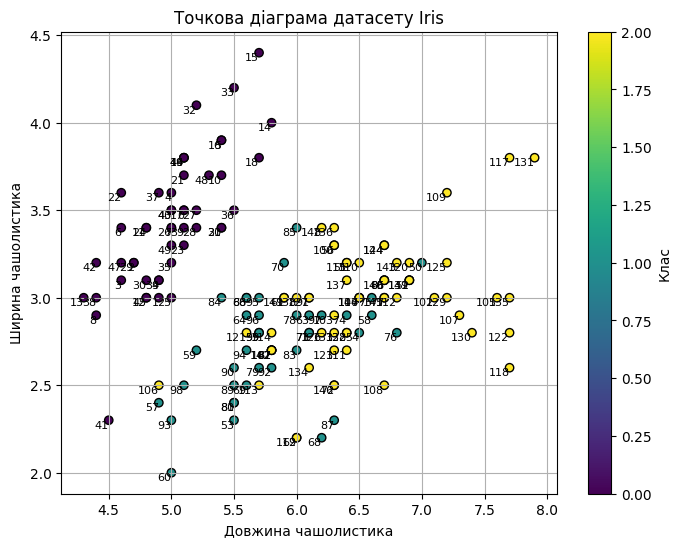

Матриця подібностей:
[[0.         0.51044687 0.45143574 ... 3.99108431 4.20952111 3.81182833]
 [0.51044687 0.         0.25712816 ... 4.0165977  4.22692453 3.82013778]
 [0.45143574 0.25712816 0.         ... 4.14064278 4.33678555 3.93011963]
 ...
 [3.99108431 4.0165977  4.14064278 ... 0.         0.50132979 0.6082202 ]
 [4.20952111 4.22692453 4.33678555 ... 0.50132979 0.         0.62402515]
 [3.81182833 3.82013778 3.93011963 ... 0.6082202  0.62402515 0.        ]]
(150, 150)


In [21]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from scipy.spatial.distance import euclidean, cityblock, minkowski, jaccard, hamming
import numpy as np

# Завантажимо набір даних Iris
iris = load_iris()
X = iris.data
y = iris.target

y = iris.target

# Відображення точкової діаграми для перших двох ознак
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Довжина чашолистика')
plt.ylabel('Ширина чашолистика')
plt.title('Точкова діаграма датасету Iris')

# Додавання номерів спостережень
for i in range(len(X)):
    plt.text(X[i, 0], X[i, 1], str(i), color='black', fontsize=8, ha='right', va='top')

plt.colorbar(label='Клас')
plt.grid(True)
plt.show()


# Обчислимо кількість зразків та ознак
n_samples, n_features = X.shape

# Ініціалізуємо матрицю подібностей
similarity_matrix = np.zeros((n_samples, n_samples))

# Обчислимо матрицю подібностей
for i in range(n_samples):
    for j in range(i, n_samples):
        # Обчислюємо різні метрики подібності
        euclidean_distance = euclidean(X[i], X[j])
        manhattan_distance = cityblock(X[i], X[j])
        minkowski_distance = minkowski(X[i], X[j], p=3)
        jaccard_similarity = jaccard(X[i] > 0, X[j] > 0)
        hamming_distance = hamming(X[i] > 0, X[j] > 0)

        # Додаємо значення метрик до матриці подібностей
        #similarity_matrix[i, j] = euclidean_distance
        #similarity_matrix[j, i] = euclidean_distance

        # similarity_matrix[i, j] = manhattan_distance
        # similarity_matrix[j, i] = manhattan_distance

        similarity_matrix[i, j] = minkowski_distance
        similarity_matrix[j, i] = minkowski_distance

        # similarity_matrix[i, j] = jaccard_similarity
        # similarity_matrix[j, i] = jaccard_similarity

        # similarity_matrix[i, j] = hamming_distance
        # similarity_matrix[j, i] = hamming_distance

print("Матриця подібностей:")
print(similarity_matrix)
print(similarity_matrix.shape)


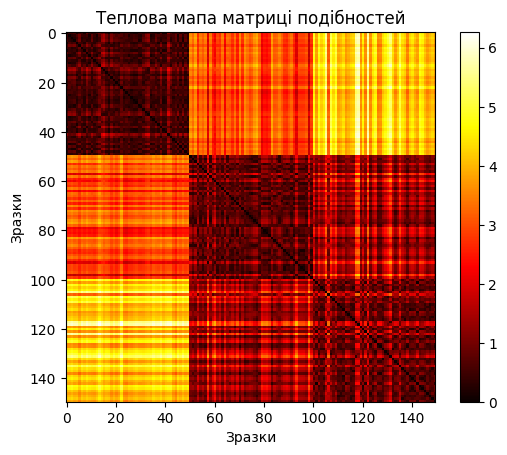

In [22]:
import matplotlib.pyplot as plt

# Відобразимо матрицю подібностей як теплову мапу
plt.imshow(similarity_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Теплова мапа матриці подібностей')
plt.xlabel('Зразки')
plt.ylabel('Зразки')
plt.show()


#Кореляція

##Кореляція Пірсона

In [23]:
# Коефіцієнт кореляції Пірсона визначає ступінь лінійної залежності між двома змінними.

import numpy as np
from scipy.stats import pearsonr

# Згенеруємо дві змінні з кореляцією
np.random.seed(42)
X = np.random.rand(100)
Y = 2 * X + 1 + 0.1 * np.random.randn(100)

# Розрахунок коефіцієнта кореляції Пірсона
correlation_coefficient, _ = pearsonr(X, Y)

print(f"Коефіцієнт кореляції Пірсона: {correlation_coefficient}")

Коефіцієнт кореляції Пірсона: 0.9881582860812734


In [24]:
# Коефіцієнт кореляції Спірмена - визначає ступінь монотонної залежності між двома змінними, незалежно від того, чи ця залежність лінійна чи нелінійна.



from scipy.stats import spearmanr

# Використовуємо ті самі дані X і Y

# Розрахунок коефіцієнта кореляції Спірмена
spearman_coefficient, _ = spearmanr(X, Y)

print(f"Коефіцієнт кореляції Спірмена: {spearman_coefficient}")

Коефіцієнт кореляції Спірмена: 0.9860786078607859


In [25]:
# Коефіцієнт кореляції Кендала - дані не повинні бути нормально розподілені, а дві змінні повинні мати лише порядковий рівень шкали.
# варто віддати перевагу кореляції Кендала над кореляцією Спірмена, коли даних дуже мало та багато зв’язків за рангом.

from scipy.stats import kendalltau

# Використовуємо ті самі дані X і Y

# Розрахунок коефіцієнта кореляції Кендала
kendall_coefficient, _ = kendalltau(X, Y)

print(f"Коефіцієнт кореляції Кендала: {kendall_coefficient}")



Коефіцієнт кореляції Кендала: 0.8997979797979799


https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016

In [26]:
!wget -O suicide-rates.csv "https://drive.usercontent.google.com/download?id=17XCHEogiPblN58LJz-zQicWIRMpfFaJ1&export=download&authuser=0"

--2024-08-06 03:28:06--  https://drive.usercontent.google.com/download?id=17XCHEogiPblN58LJz-zQicWIRMpfFaJ1&export=download&authuser=0
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 209.85.145.132, 2607:f8b0:4001:c1e::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|209.85.145.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2706377 (2.6M) [application/octet-stream]
Saving to: ‘suicide-rates.csv’

suicide-rates.csv   100%[===================>]   2.58M  --.-KB/s    in 0.04s   

2024-08-06 03:28:09 (65.6 MB/s) - ‘suicide-rates.csv’ saved [2706377/2706377]



In [27]:
import seaborn as sb

df = pd.read_csv("./suicide-rates.csv")


In [28]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [30]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [31]:
pearsoncorr = df[['year','population', 'suicides/100k pop', 'HDI for year', 'gdp_per_capita ($)', 'suicides_no'  ]].corr(method='pearson')
pearsoncorr

,year,population,suicides/100k pop,HDI for year,gdp_per_capita ($),suicides_no
year,1.000000,0.008850,-0.039037,0.366786,0.339134,-0.004546
population,0.008850,1.000000,0.008285,0.102943,0.081510,0.616162
suicides/100k pop,-0.039037,0.008285,1.000000,0.074279,0.001785,0.306604
HDI for year,0.366786,0.102943,0.074279,1.000000,0.771228,0.151399
gdp_per_capita ($),0.339134,0.081510,0.001785,0.771228,1.000000,0.061330
suicides_no,-0.004546,0.616162,0.306604,0.151399,0.061330,1.000000


<Axes: >

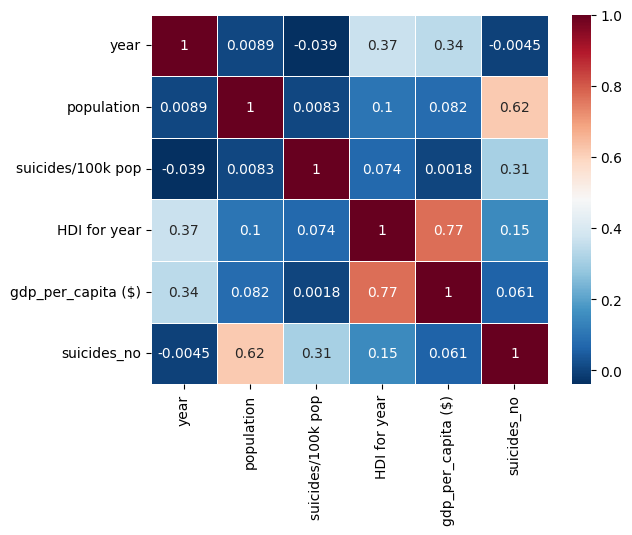

In [32]:
sb.heatmap(pearsoncorr,
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

##Приклад обчислення кореляції Кендала на наборі даних

https://www.kaggle.com/datasets/chirin/africa-economic-banking-and-systemic-crisis-data

In [33]:
!wget -O 'african_crises.csv' "https://drive.usercontent.google.com/download?id=1ZAi5hqYiTjMdpkXdG7wZqbI8w06RkcFN&export=download&authuser=0"

--2024-08-06 03:28:12--  https://drive.usercontent.google.com/download?id=1ZAi5hqYiTjMdpkXdG7wZqbI8w06RkcFN&export=download&authuser=0
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 209.85.145.132, 2607:f8b0:4001:c1e::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|209.85.145.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66984 (65K) [application/octet-stream]
Saving to: ‘african_crises.csv’

african_crises.csv  100%[===================>]  65.41K  --.-KB/s    in 0.001s  

2024-08-06 03:28:14 (76.3 MB/s) - ‘african_crises.csv’ saved [66984/66984]



In [34]:
african_crises = pd.read_csv("./african_crises.csv")
african_crises.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [35]:
african_crises.banking_crisis.unique()

array(['crisis', 'no_crisis'], dtype=object)

In [36]:
african_crises['banking_crisis'] = african_crises['banking_crisis'].map({'crisis': 1, 'no_crisis': 0})

In [37]:
african_crises = african_crises.drop(['cc3', 'country', 'year'], axis=1)
corr = african_crises.corr(method='kendall')

<Axes: >

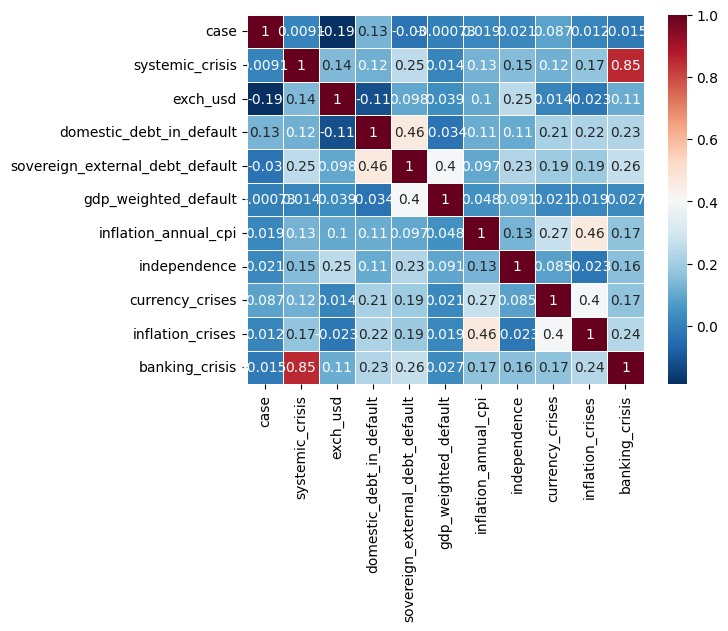

In [38]:
sb.heatmap(corr, xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#Метод k-means

In [39]:
# Визначимо невеликий штучний набір даних з 10 спостережень та двох ознак.

df = pd.DataFrame({'x0':[3, 2, 2, 3, 4, 9, 8, 8, 9, 10],
                   'x1':[1, 2, 3, 3, 2, 3, 4, 5, 5, 4]})
df

,x0,x1
0,3,1
1,2,2
2,2,3
3,3,3
4,4,2
5,9,3
6,8,4
7,8,5
8,9,5
9,10,4


In [40]:
# Матриця відстаней для даних спостережень буде містити відповідно відстані між точками на площині

import pandas as pd
from sklearn.metrics.pairwise import pairwise_distances

def distance_matrix(df, metric='euclidean'):
    """
    Обчислює матрицю відстаней для цього DataFrame.

    Параметри:
    - df: pandas DataFrame
      Вхідні дані.
    - metric: str, опціонально (за замовчуванням 'euclidean')
      Метрика відстані, яку ви хочете використовувати.

    Повертає:
    - pandas DataFrame
      Матриця відстаней.
    """
    numeric_columns = df.select_dtypes(include='number')

    # Обчислити матрицю відстаней
    distance_matrix = pairwise_distances(numeric_columns, metric=metric)

    # Створити DataFrame з результатами
    result_df = pd.DataFrame(distance_matrix, index=numeric_columns.index, columns=numeric_columns.index)

    return result_df

# Приклад використання
# data = {'Name': ['John', 'Alice', 'Bob'],
#         'Age': [25, 30, 22],
#         'Salary': [50000, 60000, 55000],
#         'Rating': [4.5, 3.8, 4.2]}



# df = pd.DataFrame(data)

#cityblock, cosine, euclidean, l1, l2, manhattan

# Вивести матрицю відстаней з евклідовою метрикою
result_matrix = distance_matrix(df, metric='manhattan')
print(result_matrix)

      0     1    2    3    4    5    6    7     8     9
0   0.0   2.0  3.0  2.0  2.0  8.0  8.0  9.0  10.0  10.0
1   2.0   0.0  1.0  2.0  2.0  8.0  8.0  9.0  10.0  10.0
2   3.0   1.0  0.0  1.0  3.0  7.0  7.0  8.0   9.0   9.0
3   2.0   2.0  1.0  0.0  2.0  6.0  6.0  7.0   8.0   8.0
4   2.0   2.0  3.0  2.0  0.0  6.0  6.0  7.0   8.0   8.0
5   8.0   8.0  7.0  6.0  6.0  0.0  2.0  3.0   2.0   2.0
6   8.0   8.0  7.0  6.0  6.0  2.0  0.0  1.0   2.0   2.0
7   9.0   9.0  8.0  7.0  7.0  3.0  1.0  0.0   1.0   3.0
8  10.0  10.0  9.0  8.0  8.0  2.0  2.0  1.0   0.0   2.0
9  10.0  10.0  9.0  8.0  8.0  2.0  2.0  3.0   2.0   0.0


<Axes: xlabel='x0', ylabel='x1'>

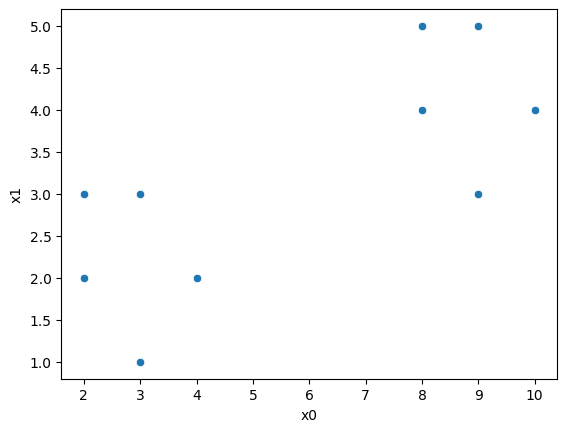

In [41]:
import seaborn as sns
sns.scatterplot(data=df, x="x0", y="x1")

In [42]:
def plot_centroids(df, x_centr):
    data = df.copy()
    data['color'] = [0] * len(df)
    df_centroids = pd.DataFrame(x_centr, columns=df.columns)
    df_centroids['color'] = [1] * len(df_centroids)

    data = pd.concat([data, df_centroids], axis=0)

    sns.scatterplot(data=data, x='x0', y='x1', hue='color' )
    return data

In [43]:
def k_means(df, k, max_iters=100):
    # Отримуємо дані з DataFrame
    X = df[['x0', 'x1']].values

    # Ініціалізуємо центроїди випадковими точками
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    print(centroids)
    # plot_centroids(df, centroids)

    for iter in range(max_iters):
        print(iter)
        plt.figure(iter)
        plot_centroids(df, centroids)
        # Розрахунок відстаней між кожною точкою та центроїдами
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)

        # Призначення кожної точки до найближчого центроїда
        labels = np.argmin(distances, axis=1)

        # Перерахунок центроїдів
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        # plot_centroids(df, new_centroids)

        # Перевірка збіжності
        if np.all(new_centroids == centroids):
            break

        centroids = new_centroids

    return centroids, labels

# В наведеній функції k_means() реалізації метода k-means суттєвим етапом є обчислення відстаней між точками спостережень.
# Від зміни способа обчислення цієї відстані буде змінюватись вигляд матриці відстаней, а отже, і результат кластеризації.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


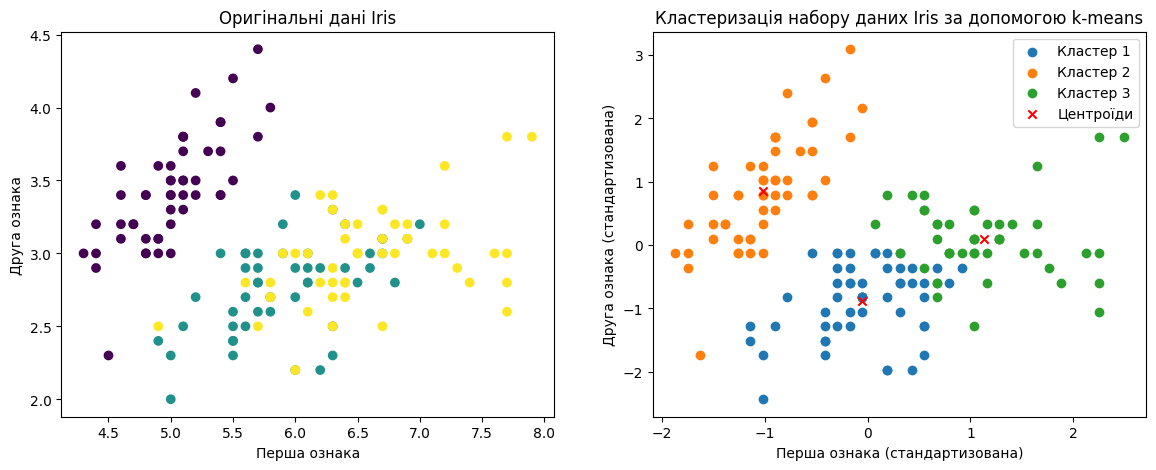

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Завантаження даних Iris
iris = load_iris()
X = iris.data
y = iris.target

# Стандартизація даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ініціалізація та навчання моделі k-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Передбачення кластерів для кожного зразка
labels = kmeans.labels_

# Візуалізація результатів
plt.figure(figsize=(14, 5))

# Піддіаграма для оригінальних даних
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Оригінальні дані Iris')
plt.xlabel('Перша ознака')
plt.ylabel('Друга ознака')

# Піддіаграма для кластеризації
plt.subplot(1, 2, 2)
for i in range(3):
    plt.scatter(X_scaled[labels == i, 0], X_scaled[labels == i, 1], label=f'Кластер {i + 1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='x', label='Центроїди')
plt.title('Кластеризація набору даних Iris за допомогою k-means')
plt.xlabel('Перша ознака (стандартизована)')
plt.ylabel('Друга ознака (стандартизована)')
plt.legend()

plt.show()


#Метод KNN

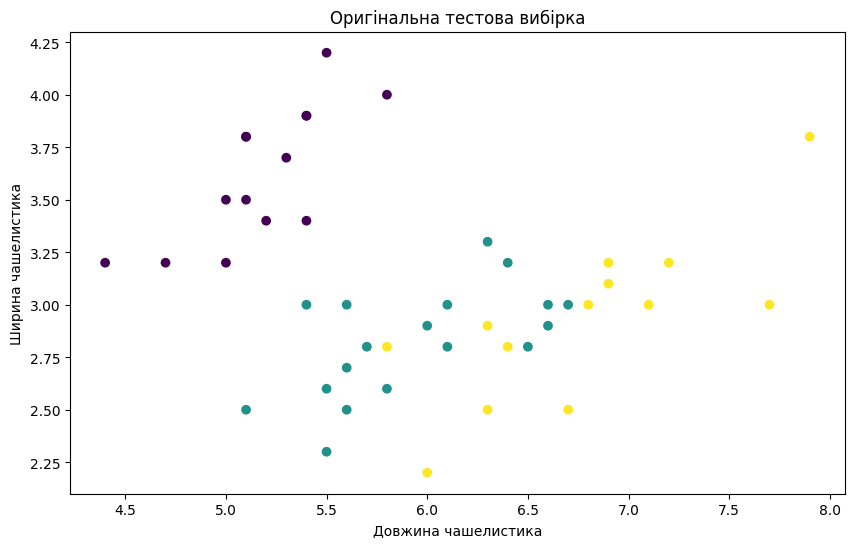

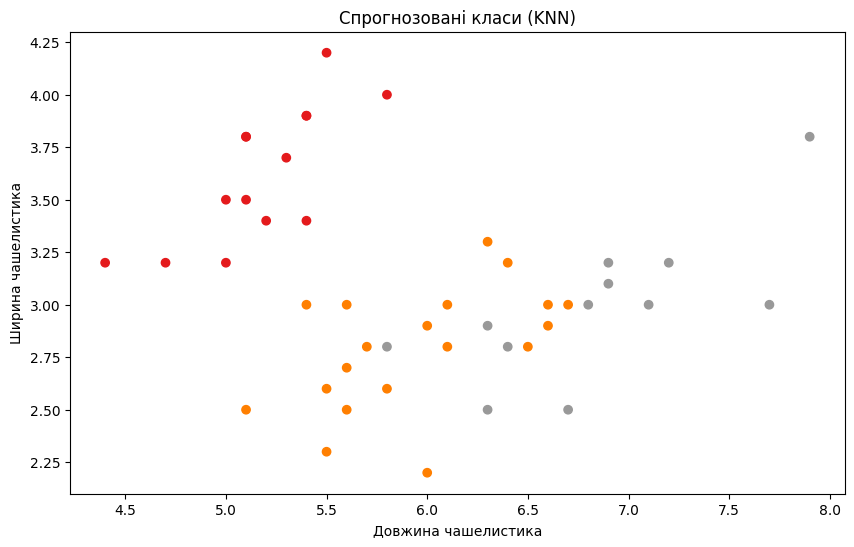

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Завантаження даних Iris
iris = load_iris()
X = iris.data
y = iris.target

# Розбиття на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Стандартизація даних
scaler = StandardScaler() # MinMaxScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ініціалізація та навчання моделі KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Передбачення класів для тестових даних
y_pred = knn.predict(X_test_scaled)


# Візуалізація оригінальної тестової вибірки
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis')
plt.title('Оригінальна тестова вибірка')
plt.xlabel('Довжина чашелистика')
plt.ylabel('Ширина чашелистика')
plt.show()

# Візуалізація спрогнозованих класів
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='Set1')
plt.title('Спрогнозовані класи (KNN)')
plt.xlabel('Довжина чашелистика')
plt.ylabel('Ширина чашелистика')
plt.show()


# Додаткові матеріали

1. По коваріації: https://youtu.be/qtaqvPAeEJY?si=dJj7gmV6kre9ekMl
2. Кореляція Пірсона: https://youtu.be/xZ_z8KWkhXE?si=7mPI5Lm1NAUNRTA9
3. Вибір оптимальних кластерів:
https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
4. Оцінка 'силуету' для кластеризації: https://medium.com/operations-research-bit/optimizing-silhouette-score-computation-in-k-means-clustering-08e1059d8914
5. Curse of dimensionality:  https://towardsdatascience.com/curse-of-dimensionality-a-curse-to-machine-learning-c122ee33bfeb
6.У продовження 'прокляття розмірності':  https://www.analyticsvidhya.com/blog/2021/04/the-curse-of-dimensionality-in-machine-learning/ та
https://towardsdatascience.com/curse-of-dimensionality-an-intuitive-exploration-1fbf155e1411